In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
data=pd.read_csv('housing.csv')

In [127]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### like previously we chnage the null value of total bedroom to zero assume that who take that data is take null value when there is no bedroom

In [129]:
data.fillna(0,inplace=True)

## Replace the value of ocean proximity

In [130]:
data['ocean_proximity'].replace({'NEAR BAY':1,'<1H OCEAN':2,'INLAND':3,"NEAR OCEAN":4,'ISLAND':5},inplace=True)

In [131]:
import seaborn as sns

# data Visualize

In [132]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.004114
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004114,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


In [133]:
dfc=data.corr()
dfc["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049148
population           -0.024650
longitude            -0.045967
latitude             -0.144160
ocean_proximity      -0.210600
Name: median_house_value, dtype: float64

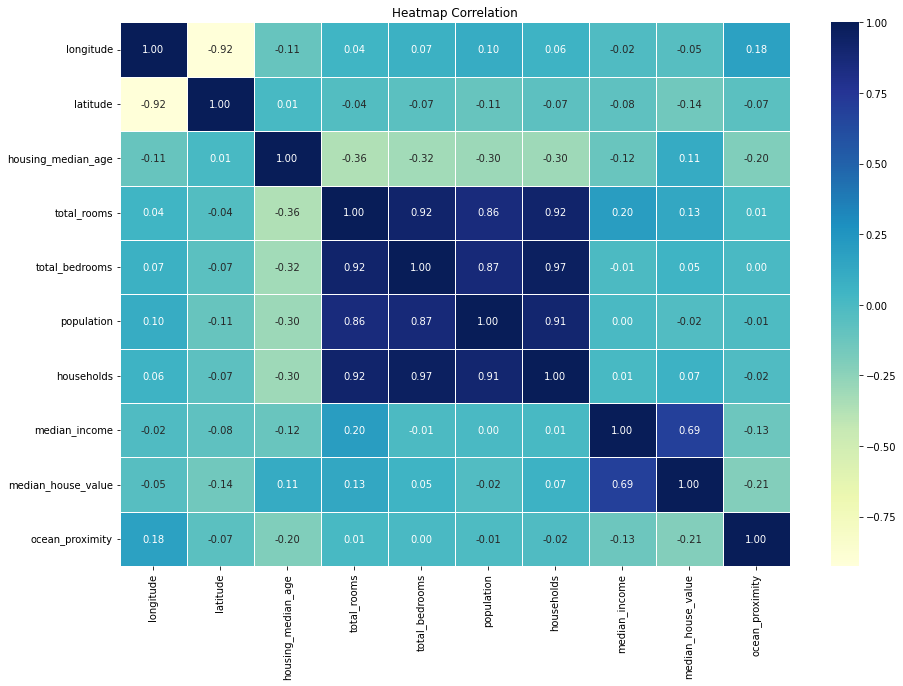

In [134]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))

# Plot
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu", )

# Customization
plt.title("Heatmap Correlation")
plt.show()

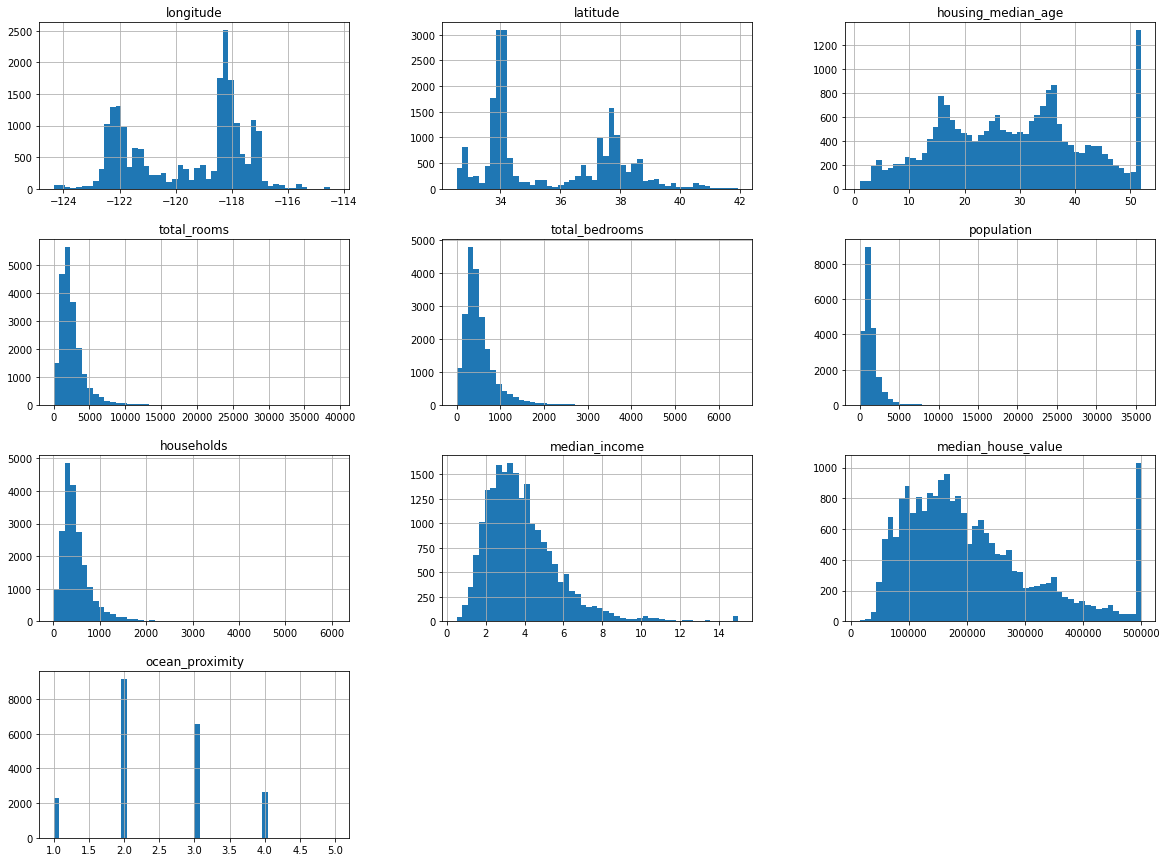

In [135]:
data.hist(bins=50,figsize=(20,15))
plt.show()

# Classify target data
### We classify the median_house_value into five after seeing the histogram plot

In [136]:
data["median_house_value"] = np.where(data["median_house_value"] <= 100000, 600000, data["median_house_value"]  )

In [137]:
data["median_house_value"] = np.where(data["median_house_value"] <= 200000, 600001, data["median_house_value"]  )

In [138]:
data["median_house_value"] = np.where(data["median_house_value"] <= 300000, 600003, data["median_house_value"]  )

In [139]:
data["median_house_value"] = np.where(data["median_house_value"] <= 400000, 600004, data["median_house_value"]  )

In [140]:
data["median_house_value"] = np.where(data["median_house_value"] <= 500002, 600005, data["median_house_value"]  )

In [141]:
data["median_house_value"].replace({600000:'low',600001:'medlow',600003:'med',600004:'medhigh',600005:'high'},inplace=True)

In [142]:
data["median_house_value"].unique()

array(['high', 'medhigh', 'med', 'medlow', 'low'], dtype=object)

In [143]:
y= data[['median_house_value']]

In [144]:
x=data.drop(columns=['median_house_value'])

In [145]:
x=np.array(x)

In [146]:
y=np.array(y)

In [147]:
np.unique(y)

array(['high', 'low', 'med', 'medhigh', 'medlow'], dtype=object)

In [148]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import StandardScaler

In [149]:
mymodel=SGDClassifier()

# SGD Classifier

In [151]:
acc = 0.1
while acc < 0.55:
    myscaler=StandardScaler()
    myscaler.fit(x)
    xs=myscaler.transform(x)
    xtrain, xtest, ytrain, ytest = tts(xs, y, test_size=0.2) # split the data
    mymodel.fit(xtrain, ytrain.ravel())
    yhat = mymodel.predict(xtest)
    acc=accuracy_score(ytest,yhat)
    print(acc)
print(acc)

0.5305232558139535
0.5453003875968992
0.5499031007751938
0.530281007751938
0.5360949612403101
0.5213178294573644
0.5370639534883721
0.5251937984496124
0.5157461240310077
0.5184108527131783
0.5380329457364341
0.5247093023255814
0.5416666666666666
0.5271317829457365
0.531734496124031
0.5232558139534884
0.5237403100775194
0.5121124031007752
0.531734496124031
0.5278585271317829
0.5065406976744186
0.5159883720930233
0.5147771317829457
0.5472383720930233
0.5089631782945736
0.5167151162790697
0.5474806201550387
0.5295542635658915
0.5232558139534884
0.5501453488372093
0.5501453488372093


### After many tries, we get the best maximum accuracy_score at < 0.55
## means that we get only 55 perc. correct value
### if we get the another best value in another model (switch it to that model)

# RandomForestClassifier

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
forest = RandomForestClassifier(n_estimators=75)
acc = 0.1
while acc < 0.6:
    xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2) # split the data
    forest.fit(xtrain, ytrain.ravel())
    yhat = mymodel.predict(xtest)
    acc=accuracy_score(ytest,yhat)
    print(acc)
print(acc)

0.5687984496124031
0.5813953488372093
0.5734011627906976
0.5782461240310077
0.5806686046511628
0.5876937984496124
0.5804263565891473
0.5811531007751938
0.5816375968992248
0.5794573643410853
0.5821220930232558
0.5886627906976745
0.5823643410852714
0.5801841085271318
0.5777616279069767
0.5983527131782945
0.5724321705426356
0.5736434108527132
0.5775193798449613
0.595203488372093
0.5813953488372093
0.5889050387596899
0.5738856589147286
0.5792151162790697
0.5792151162790697
0.5843023255813954
0.5864825581395349
0.5879360465116279
0.5717054263565892
0.592296511627907
0.5796996124031008
0.5855135658914729
0.6019864341085271
0.6019864341085271


### After many tries, we get the best maximum accuracy_score at < 0.6
## means that we increase to 60 perc. correct value
### if we get the another best value in another model (switch it to that model)

In [176]:
from sklearn.neural_network import MLPClassifier

In [180]:
mlp= MLPClassifier(hidden_layer_sizes=(7,7),activation='relu',solver='lbfgs',max_iter=100000)


In [181]:
acc = 0.1
while acc < 0.6:
    xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2) # split the data
    mlp.fit(xtrain, ytrain.ravel())
    yhat = mymodel.predict(xtest)
    acc=accuracy_score(ytest,yhat)
    print(acc)
print(acc)

0.5743701550387597
0.5813953488372093
0.5850290697674418
0.5707364341085271
0.5852713178294574
0.5898740310077519


C:\Users\saood\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5811531007751938
0.5833333333333334
0.5801841085271318


C:\Users\saood\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.565406976744186


C:\Users\saood\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5804263565891473


C:\Users\saood\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5690406976744186


C:\Users\saood\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5830910852713178
0.5816375968992248
0.5833333333333334
0.5782461240310077


C:\Users\saood\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5855135658914729
0.5799418604651163
0.5862403100775194
0.5719476744186046
0.5753391472868217


C:\Users\saood\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5864825581395349
0.5840600775193798
0.5789728682170543
0.5700096899224806
0.5741279069767442
0.5857558139534884
0.5830910852713178
0.5794573643410853
0.5879360465116279
0.5862403100775194


C:\Users\saood\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5850290697674418
0.592781007751938
0.5830910852713178
0.6036821705426356
0.6036821705426356


### we increse max iteration to 10000 but some times its again reach at max- iteration gives warning but loops we create helps and run program again

### After many tries, we get again maximum accuracy_score at < 0.6
## means that  60 perc. correct value
### if we get the another best value in another model (switch it to that model)

# Decision Tree

In [246]:
from sklearn.tree import DecisionTreeClassifier

### at max_depth=8 

In [247]:
mytree = DecisionTreeClassifier(max_depth=8)
acc = 0.1
while acc < 0.65:
    xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)
    mytree.fit(xtrain,ytrain)
    yhatr=mytree.predict(xtest)
    acc=accuracy_score(ytest,yhatr)
    print(acc)
print(acc)

0.6258074935400517
0.6304909560723514
0.647125322997416
0.6447028423772609
0.627422480620155
0.6338824289405685
0.6388888888888888
0.6385658914728682
0.6233850129198967
0.6351744186046512
0.6356589147286822
0.6442183462532299
0.6287144702842378
0.6392118863049095
0.6258074935400517
0.6243540051679587
0.6405038759689923
0.6348514211886305
0.6379198966408268
0.6374354005167958
0.6327519379844961
0.6206395348837209
0.6351744186046512
0.6277454780361758
0.6275839793281653
0.6427648578811369
0.622577519379845
0.6333979328165374
0.6455103359173127
0.6261304909560723
0.6283914728682171
0.6275839793281653
0.6295219638242894
0.6427648578811369
0.6430878552971576
0.6340439276485789
0.6435723514211886
0.6358204134366925
0.6469638242894057
0.625
0.6317829457364341
0.6346899224806202
0.6379198966408268
0.6359819121447028
0.6393733850129198
0.6287144702842378
0.6311369509043928
0.6411498708010336
0.6380813953488372
0.6393733850129198
0.6298449612403101
0.6388888888888888
0.6094961240310077
0.6342054

### at max_depth=10 

In [254]:
mytree2 = DecisionTreeClassifier(max_depth=10)
acc = 0.1
while acc < 0.67:
    xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)
    mytree2.fit(xtrain,ytrain)
    yhatr=mytree2.predict(xtest)
    acc=accuracy_score(ytest,yhatr)
    print(acc)
print(acc)

0.64906330749354
0.6521317829457365
0.6450258397932817
0.6401808785529716
0.6385658914728682
0.6497093023255814
0.6513242894056848
0.6427648578811369
0.6416343669250646
0.6477713178294574
0.6524547803617571
0.6550387596899225
0.6532622739018088
0.6468023255813954
0.6547157622739018
0.662467700258398
0.6564922480620154
0.6576227390180879
0.6539082687338501
0.6534237726098191
0.6647286821705426
0.6550387596899225
0.6464793281653747
0.6566537467700259
0.6524547803617571
0.6585917312661499
0.6440568475452196
0.6542312661498708
0.6522932816537468
0.6450258397932817
0.6422803617571059
0.6366279069767442
0.6593992248062015
0.6414728682170543
0.661983204134367
0.6569767441860465
0.6501937984496124
0.6521317829457365
0.6560077519379846
0.648094315245478
0.6561692506459949
0.6621447028423773
0.6581072351421189
0.645187338501292
0.6484173126614987
0.6511627906976745
0.6571382428940569
0.6537467700258398
0.6501937984496124
0.6539082687338501
0.6453488372093024
0.6582687338501292
0.648094315245478


### After many tries, we get again maximum accuracy_score at < 0.67 but we get the best value at max depth = 10 after inc. maxdepth not very much change 
## means that  67 perc. correct value
### if we get the another best value in another model (switch it to that model)

# SVC

In [255]:
from sklearn.svm import LinearSVC

In [266]:
svc = LinearSVC ( C=2.0, dual = False)  
accuracy = 0.1
while accuracy < 0.59:
    xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)
    svc.fit(xtrain,ytrain.ravel())
    yhats = mymodel.predict(xtest)
    accuracy = accuracy_score(ytest,yhats)
    print(accuracy)
print(accuracy)

0.5807493540051679
0.5852713178294574
0.5893087855297158
0.5823643410852714
0.5815568475452196
0.5780038759689923
0.5818798449612403
0.5773578811369509
0.5817183462532299
0.5828488372093024
0.5780038759689923
0.5849483204134367
0.5762273901808785
0.5952842377260982
0.5952842377260982


### After many tries, we get the best maximum accuracy_score at < 0.59 of current model
## means that we increase to 59 perc. correct value
### if we get the another best value in another model (switch it to that model)

# KNN

In [267]:
from sklearn.neighbors import KNeighborsClassifier

In [279]:
knn = KNeighborsClassifier(n_neighbors = 1)
accur = 0.1
while accur < 0.37:
    xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)
    knn.fit(xtrain,ytrain.ravel())
    yhatk = knn.predict(xtest)
    accur = accuracy_score(ytest,yhatk)
    print(accur)
print(accur)

0.35852713178294576
0.35271317829457366
0.3588501291989664
0.3611111111111111
0.3633720930232558
0.3719315245478036
0.3719315245478036


### we gwt very bad result using KNN classifier

# <span style='color:red'>  Conclusion.  </span>

### concluding that we get best result using decision tree but we use max_depth but it is also not very much good because around 33 percentage is wrong
### means classifying did not help to achive good accuracy
## we take null value of bedroom = 0 if we take another value it also effect the data and if we omit value negatively relate data may be it get good result
## in future we see the result after above changes

# in my opininon random forest regressor is best for this data/

# <span style='color:red'> ----- .  </span>